In [2]:
import PIL.Image as Image
from ultralytics import YOLO

In [3]:
# Test best model
best_model = YOLO('../results/trained/weights/best.pt')
test = best_model.val(
    data='../data/final/data.yaml',
    split='test',
    device='cuda',
    imgsz=640,
    plots=True,
    project='../results',
    name='test',
    single_cls=True,
    save_json=True,
)

Ultralytics 8.4.9  Python-3.13.11 torch-2.9.1+cu130 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16376MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 3111.7126.4 MB/s, size: 1451.5 KB)
val: Scanning C:\Projects\SusDetector2\data\final\labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 36/36 9.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.9it/s 1.6s0.4s
                   all         36         36      0.914      0.884      0.926      0.873
Speed: 1.3ms preprocess, 3.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Saving C:\Projects\SusDetector2\code\runs\results\test\predictions.json...
Results saved to C:\Projects\SusDetector2\code\runs\results\test


In [4]:
# Display results dataframe
test.to_df()

Class,Images,Instances,Box-P,Box-R,Box-F1,mAP50,mAP50-95
str,i64,i64,f64,f64,f64,f64,f64
"""item""",36,36,0.91387,0.88428,0.89883,0.92554,0.87293


In [5]:
json = test.to_json()
with open('../results/test/results.json', 'w') as f:
    f.write(json)


image 1/1 C:\Projects\SusDetector2\code\..\real_example.png: 416x640 1 item, 53.5ms
Speed: 2.0ms preprocess, 53.5ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


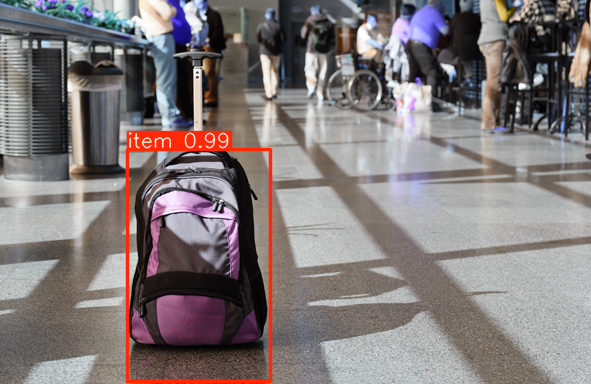

In [10]:
# Test with a real example
Image.fromarray(best_model('../real_example.png', show_labels=True)[0].plot())